# Model Evaluation 
## Confusion Matrix, Sensitivity, Specificity and Accuracy

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('diabetes.xlsx') 

In [4]:
df.head()

,Glucose,Diabetes
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1


In [5]:
df.shape

(768, 2)

In [6]:
#Feature and target
X = df['Glucose']
y = df['Diabetes']

In [7]:
#Split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [8]:
# Build a binary classification model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Diabetes   No. Observations:                  537
Model:                            GLM   Df Residuals:                      535
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.47
Date:                Sun, 21 Jul 2024   Deviance:                       558.94
Time:                        16:32:49   Pearson chi2:                 1.01e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2226
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5744      0.520    -10.719      0.000      -6.594      -4.555
Glucose        0.0397      0.004      9.856      0.000       0.032       0.048
==============================================================================
"""

In [9]:
y_train_pred = res.predict(X_train_sm) 

In [10]:
data = {'Blood Sugar Level':X_train, 'Diabetes':y_train, 'y_train_pred':y_train_pred}
dib_train = pd.DataFrame(data)

In [11]:
dib_train

,Blood Sugar Level,Diabetes,y_train_pred
155,152,1,0.612023
150,136,0,0.455384
78,131,1,0.406777
9,125,1,0.350842
142,108,0,0.215890
...,...,...,...
578,133,0,0.426056
53,176,1,0.803445
350,92,0,0.127356
79,112,0,0.243960


In [12]:
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
dib_train.head()

,Blood Sugar Level,Diabetes,y_train_pred,Diabetes_predicted
155,152,1,0.612023,1
150,136,0,0.455384,0
78,131,1,0.406777,0
9,125,1,0.350842,0
142,108,0,0.215890,0


The correct classification and misclassification are determined by the confusion matrix

In [14]:
from sklearn import metrics
confusion = metrics.confusion_matrix(dib_train.Diabetes, dib_train.Diabetes_predicted)
print(confusion)
# Let's check the overall accuracy.
print(metrics.accuracy_score(dib_train.Diabetes, dib_train.Diabetes_predicted))

[[309  41]
 [ 96  91]]
0.74487895716946


In [15]:
# Let's calculate Sensitivity, Specificity and accuracy with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    dib_train[i]= dib_train.y_train_pred.map(lambda x: 1 if x > i else 0)
dib_train.head()

,Blood Sugar Level,Diabetes,y_train_pred,Diabetes_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
155,152,1,0.612023,1,1,1,1,1,1,1,1,0,0,0
150,136,0,0.455384,0,1,1,1,1,1,0,0,0,0,0
78,131,1,0.406777,0,1,1,1,1,1,0,0,0,0,0
9,125,1,0.350842,0,1,1,1,1,0,0,0,0,0,0
142,108,0,0.215890,0,1,1,1,0,0,0,0,0,0,0


In [26]:
from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
cutoff_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Sensitivity', 'Specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(dib_train.Diabetes, dib_train[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]


In [27]:
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.348231     1.000000     0.000000
0.1          0.1  0.432030     0.983957     0.137143
0.2          0.2  0.618250     0.898396     0.468571
0.3          0.3  0.718808     0.754011     0.700000
0.4          0.4  0.744879     0.604278     0.820000
0.5          0.5  0.744879     0.486631     0.882857
0.6          0.6  0.743017     0.390374     0.931429
0.7          0.7  0.739292     0.304813     0.971429
0.8          0.8  0.694600     0.155080     0.982857
0.9          0.9  0.655493     0.016043     0.997143


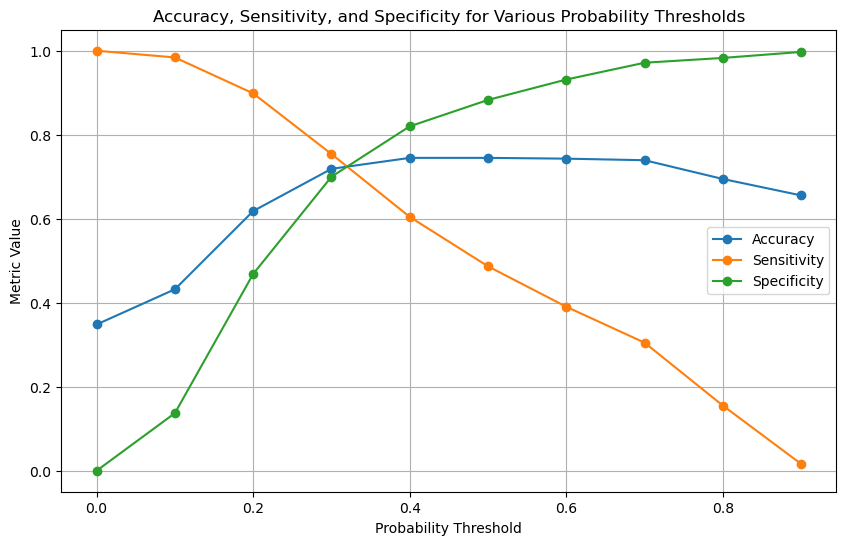

In [28]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cutoff_df['Probability'], cutoff_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(cutoff_df['Probability'], cutoff_df['Sensitivity'], label='Sensitivity', marker='o')
plt.plot(cutoff_df['Probability'], cutoff_df['Specificity'], label='Specificity', marker='o')
plt.xlabel('Probability Threshold')
plt.ylabel('Metric Value')
plt.title('Accuracy, Sensitivity, and Specificity for Various Probability Thresholds')
plt.legend()
plt.grid(True)
plt.show()

The plot between sensitivity, specificity, and accuracy shows their variation with various values of cut-off. Also can be seen from the plot the sensitivity and specificity are inversely proportional. The point where the sensitivity and specificity curves cross each other gives the optimum cut-off value. This value is 0.32 for the above plot. Let us calculate the value of Sensitivity, Specificity, and accuracy at the optimum point.

In [29]:
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.32 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(dib_train.Diabetes, dib_train.Diabetes_predicted))

0.7281191806331471


In [31]:
# Confusion matrix
confusion = metrics.confusion_matrix(dib_train.Diabetes, dib_train.Diabetes_predicted)
print(confusion)

[[253  97]
 [ 49 138]]


In [33]:
# Let's see the sensitivity of our logistic regression model

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

TP / float(TP+FN)

0.7379679144385026

In [34]:
# Let us calculate specificity

TN / float(TN+FP)

0.7228571428571429

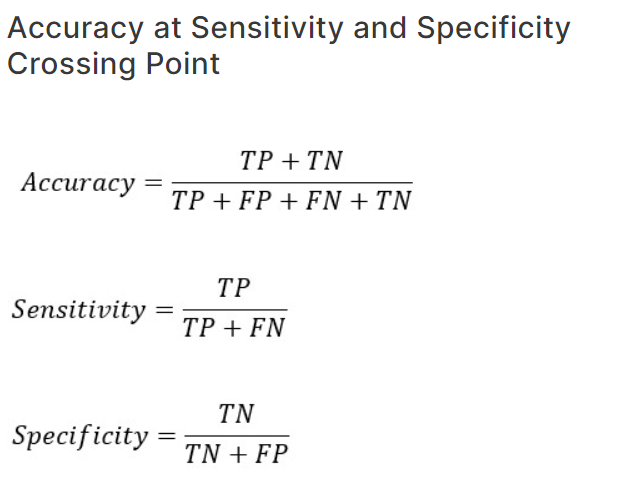

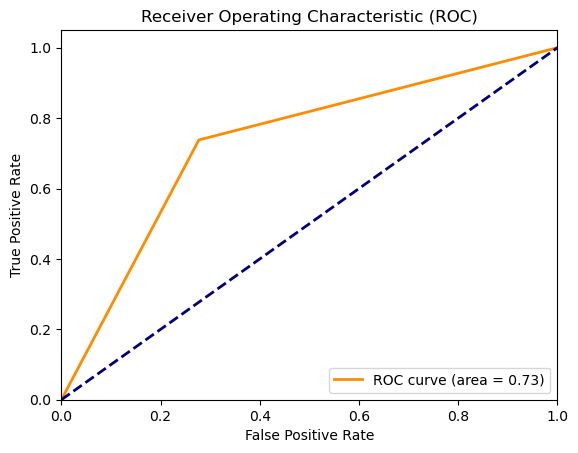

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming dib_train[i] contains the predicted probabilities for the positive class
# and dib_train.Diabetes contains the true labels

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(dib_train.Diabetes, dib_train.Diabetes_predicted)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()